<class 'pandas.core.frame.DataFrame'>
Int64Index: 2160 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2160 non-null   float64
 1   MntWines             2160 non-null   int64  
 2   MntFruits            2160 non-null   int64  
 3   MntMeatProducts      2160 non-null   int64  
 4   MntFishProducts      2160 non-null   int64  
 5   MntSweetProducts     2160 non-null   int64  
 6   MntGoldProds         2160 non-null   int64  
 7   NumDealsPurchases    2160 non-null   int64  
 8   NumWebPurchases      2160 non-null   int64  
 9   NumCatalogPurchases  2160 non-null   int64  
 10  NumStorePurchases    2160 non-null   int64  
 11  Age                  2160 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 219.4 KB


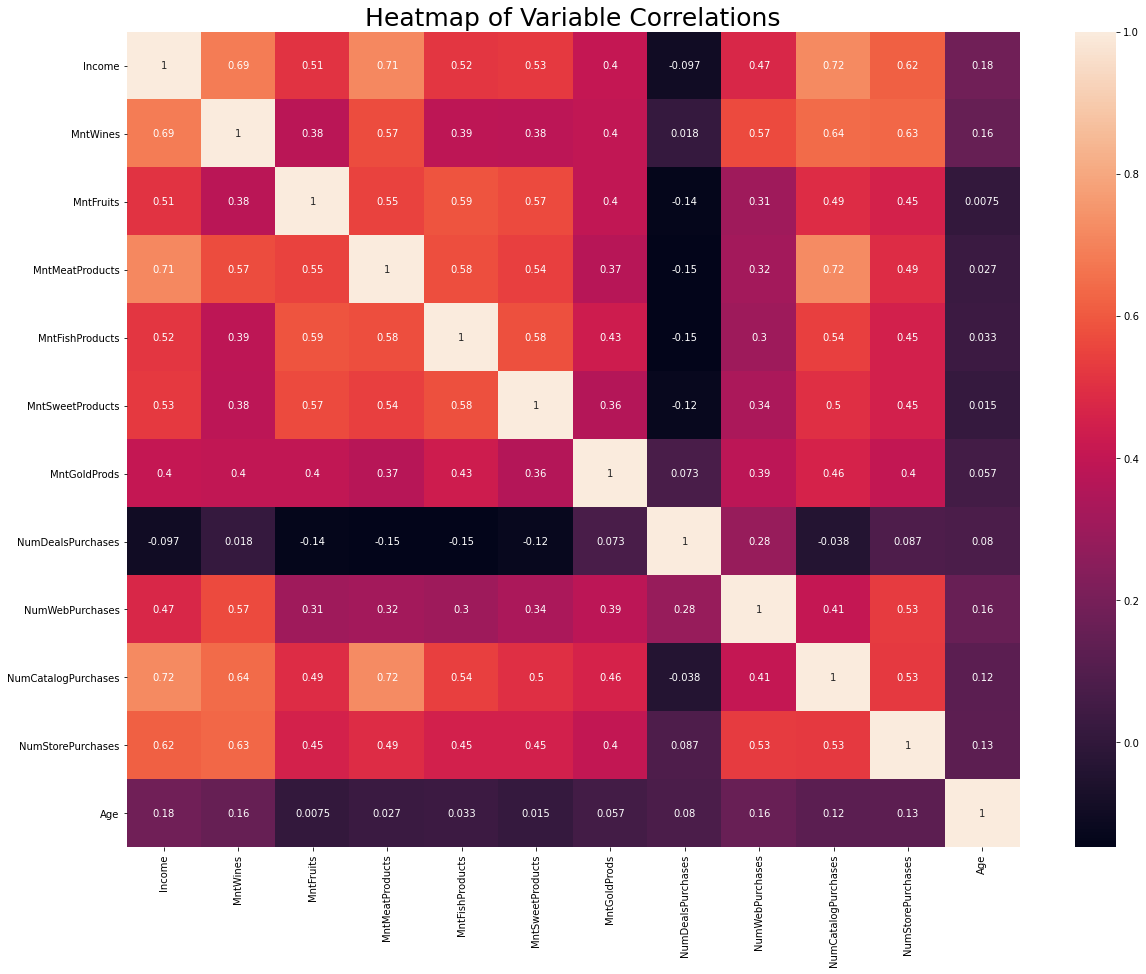

In [4]:
!pip install xgboost
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import pickle
import seaborn as sns

dataset = pd.read_csv("Data1.csv", sep ="\t")

dataset["Age"] = 2022 - dataset["Year_Birth"]
dataset = dataset.drop(["Year_Birth","ID","Education","Marital_Status","AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Z_CostContact","Z_Revenue","Response","Dt_Customer","NumWebVisitsMonth","Complain","Recency", "Teenhome","Kidhome"], axis=1)
dataset = dataset[dataset["Income"].between(15000, 200000)]
dataset = dataset[dataset["Age"].between(18,100)]
dataset = dataset.fillna(0)
dataset.info()

plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True)
plt.title('Heatmap of Variable Correlations',fontsize=25)
plt.show()


def actual_vs_predicted_plot(y_true, y_pred):
    import numpy as np
    import matplotlib.pyplot as plt
    min_value=np.array([np.array(y_true.min()), y_pred.min()]).min()
    max_value=np.array([np.array(y_true.max()), y_pred.max()]).max()
    fig, ax = plt.subplots(figsize=(10,5))
    ax.scatter(y_true,y_pred, color= "crimson")
    ax.plot([min_value,max_value], [min_value, max_value], lw=4, color="Black")
    ax.set_title("Actual vs Predicted Plot")
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

In [2]:
y = dataset["Income"]
X = dataset.drop(["Income"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05) 

In [ ]:
regforestGS = RandomForestRegressor(n_estimators = 2000).fit(X_train,y_train)

params = { 'max_depth': range(1,20),
           'n_estimators': range(0, 2000, 100)}

improved2 = GridSearchCV(regforestGS, params, cv=5)

improved2.fit(X_train, y_train)
improved2.best_params_

7734.7862346602 0.14514681814054275


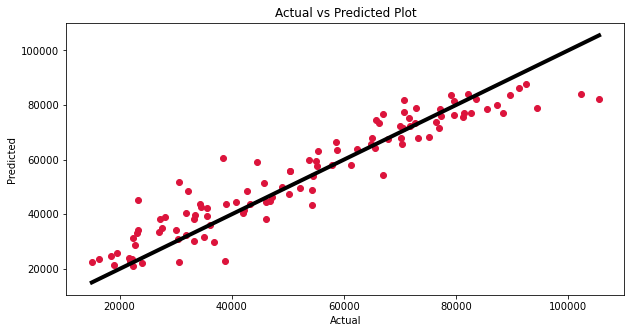

In [3]:
regforest = RandomForestRegressor(random_state=1, max_depth = 17, n_estimators = 500).fit(X_train,y_train)

predicitons = regforest.predict(X_test)

print(mean_squared_error(y_test, predicitons, squared=False), mean_absolute_percentage_error(y_test, predicitons))
actual_vs_predicted_plot(y_test, predicitons)

In [4]:
filename = 'finalized_extended_income_model.sav'
pickle.dump(regforest, open(filename, 'wb'))

In [5]:
dataset.loc[X_train.index,:].to_csv("data.csv", index=False)
dataset.loc[X_test.index,:].drop("Income", axis=1).to_csv("guineapigs.csv", index=False)

guinea_pigs = pd.read_csv("guineapigs.csv")

loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(guinea_pigs)

array([34101.55166882, 63735.10057106, 57981.17719144, 44398.73482836,
       23581.58096825, 48340.64887891, 55688.34548928, 76493.75709686,
       46199.76533662, 78362.14536498, 42788.28746217, 21169.61275   ,
       57912.31967931, 75650.33389961, 76963.77737509, 83584.35989904,
       82130.518     , 24892.49529412, 65665.85313989, 74429.69726101,
       77527.80277389, 82340.17143583, 75087.83689539, 23653.46626144,
       45066.93675   , 23985.19039614, 38320.64384925, 79008.39330879,
       51981.19221204, 68364.6206705 , 63640.14946753, 41685.96150714,
       51456.65517446, 53865.07224779, 71524.1477618 , 72344.56211595,
       44752.97408788, 49983.71837121, 77195.62807359, 31831.5536391 ,
       22498.18106072, 34999.08767792, 36180.98810007, 65766.16682915,
       38852.32994762, 48878.68991664, 32977.00822372, 67964.6317013 ,
       31092.63952871, 86127.712     , 72273.49261967, 22153.38859646,
       40477.8564859 , 68023.04839632, 34365.43472439, 80073.58498224,
      